# Cryptocurrency connection to blockchain.info

In [1]:
import requests
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
def plot_single(S2, x, y, label):
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    axes.plot(S2[x], S2[y], color='k', label=label)
    #axes.set_ylabel(y)
    axes.set_xlabel('time')
    axes.legend(loc='upper left')
    axes.set_title('cryptocurrency - ' + y)
    plt.show()
    
def plot_multi(S2, ys):
    
    colours = cm.get_cmap(name = 'rainbow', lut = len(ys))
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    
    for i, y in enumerate(ys):
        axes.plot(S2['x_'], S2[y], color=colours(i), label=y)
        #axes.set_ylabel(y)
        axes.set_xlabel('time')
        axes.legend(loc='upper left')
        axes.set_title('cryptocurrency - multiplot')
    
    plt.show()

## Request data

### blockchain.info URL request

Data is gathered from blockchain.info's api. The url defines what data is gathered. 

url is set to gather the 'number of transactions per day' data. Defaults to one year (unixtime), incremented by a day.

In [3]:
#n_transactions_url = 'https://api.blockchain.info/charts/n-transactions?format=json'
#n_transactions_label = 'n_transactions'
url_tuple = [('https://api.blockchain.info/charts/n-transactions?format=json', 'n_transactions'),
             ('https://api.blockchain.info/charts/market-price?format=json', 'market_price')]

S2 = pd.DataFrame()

for url, label in url_tuple:
    response = requests.get(url=url)
    data = response.json()
    x = [ d['x'] for d in data['values'] ]
    y = [ d['y'] for d in data['values'] ]
    if 'x_' in S2.columns.values:
        url_df = pd.DataFrame({label+'_x_': x, label: y})
    else:
        url_df = pd.DataFrame({'x_epoch': x, label: y})
        url_df['x_'] = pd.to_datetime(url_df['x_epoch'], unit='s')
    S2 = pd.concat([S2, url_df], axis=1)

print(S2.head())

      x_epoch  n_transactions         x_  market_price_x_  market_price
0  1496361600        271539.0 2017-06-02       1496361600   2446.142414
1  1496448000        305320.0 2017-06-03       1496448000   2525.765158
2  1496534400        266044.0 2017-06-04       1496534400   2516.173143
3  1496620800        289930.0 2017-06-05       1496620800   2698.313813
4  1496707200        297416.0 2017-06-06       1496707200   2883.313697


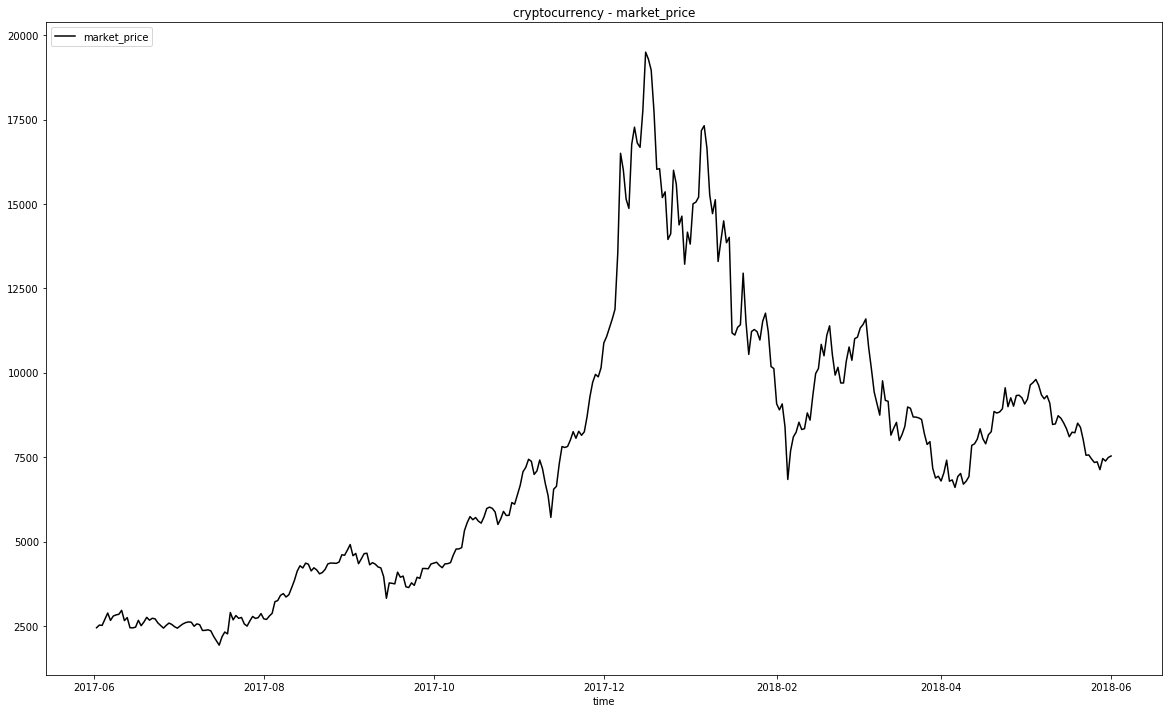

In [4]:
plot_single(S2, 'x_', 'market_price', 'market_price')

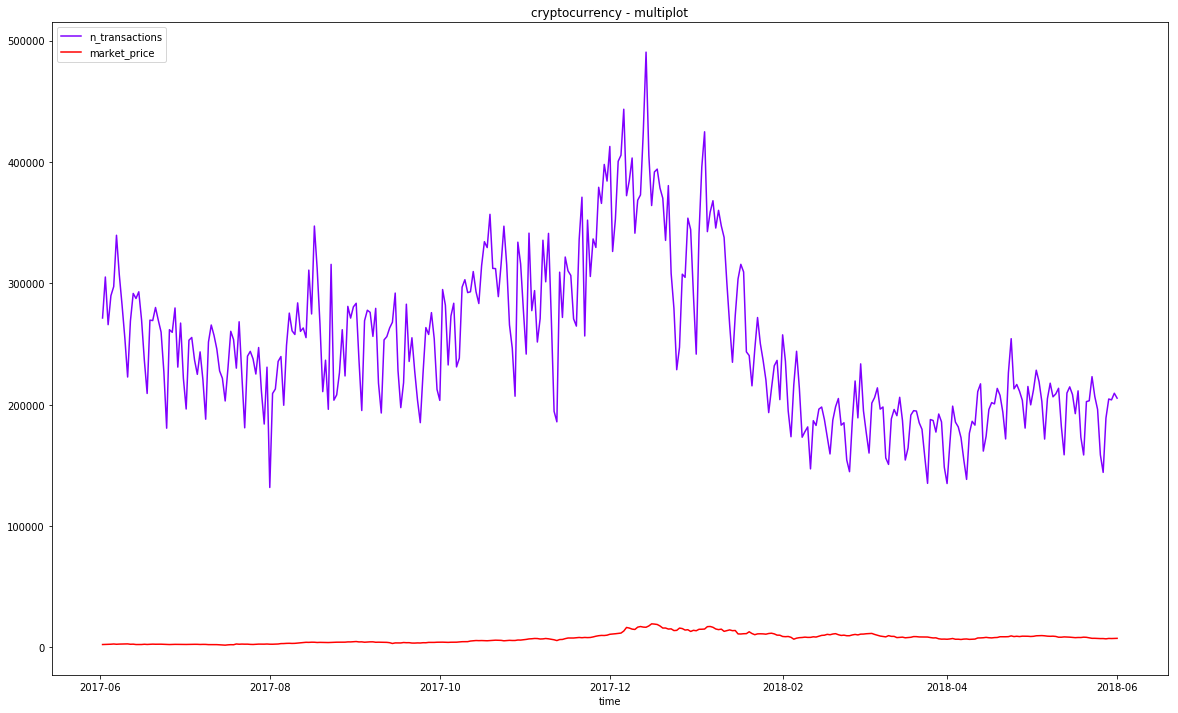

In [5]:
selected_labels = [ x[1] for x in url_tuple ]
plot_multi(S2, selected_labels)